# Tutorial - Step5 : MTMR evaluation by comparing to SOTA models

## 1. Import requirements

In [1]:
import os
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from MTMR.evaluate import evaluate_metric_v2

## 2. Specify a target property

In [3]:
PROPERTY_NAME = "qed"

## 3. Set directories (for inputs and outputs)

In [4]:
input_data_dir = os.path.join("DATA", PROPERTY_NAME)
input_our_dir = os.path.join("outputs_Tutorial_4_MTMR_translation", PROPERTY_NAME)
input_base_dir = os.path.join("DATA", "baselines")

In [5]:
_output_dir = "outputs_Tutorial_5_MTMR_evaluation"
if not os.path.exists(_output_dir):
    os.mkdir(_output_dir)

output_dir = os.path.join(_output_dir, PROPERTY_NAME)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 4. Set file names

In [6]:
filepath_train_rdkit = os.path.join(input_data_dir, "rdkit_train_pairs.txt")

In [7]:
df_pairs_rdkit = pd.read_csv(filepath_train_rdkit, header=None, sep=" ")
targets_rdkit = set(df_pairs_rdkit.iloc[:,1].values.tolist())

In [8]:
filepath_MTMR  = os.path.join(input_our_dir, f"MTMR_{PROPERTY_NAME.upper()}.csv")
filepath_JTVAE = os.path.join(input_base_dir, f"JTVAE_{PROPERTY_NAME.upper()}.csv")
filepath_G2G   = os.path.join(input_base_dir, f"VJTNN_{PROPERTY_NAME.upper()}.csv")
filepath_CORE  = os.path.join(input_base_dir, f"CORE_{PROPERTY_NAME.upper()}.csv")
filepath_G2GG  = os.path.join(input_base_dir, f"VJTNN+GAN_{PROPERTY_NAME.upper()}.csv")
filepath_MOLCG = os.path.join(input_base_dir, f"MOLCG_{PROPERTY_NAME.upper()}.csv")
filepath_HIER  = os.path.join(input_base_dir, f"HierG2G_{PROPERTY_NAME.upper()}.csv")
filepath_UGMMT = os.path.join(input_base_dir, f"UGMMT_{PROPERTY_NAME.upper()}.csv")

## 5. Load translation results generated from the test dataset

In [9]:
df_MTMR  = pd.read_csv(filepath_MTMR,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_JTVAE = pd.read_csv(filepath_JTVAE, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_G2G   = pd.read_csv(filepath_G2G,   header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_CORE  = pd.read_csv(filepath_CORE,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_G2GG  = pd.read_csv(filepath_G2GG,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_HIER  = pd.read_csv(filepath_HIER,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_MOLCG = pd.read_csv(filepath_MOLCG, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_UGMMT = pd.read_csv(filepath_UGMMT, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})

## 6. Evaluate metrics

In [10]:
frames = []

for i, (name, df) in enumerate([('MTMR', df_MTMR),
                                 ('JTVAE', df_JTVAE),
                                 ('VJTNN', df_G2G),
                                 ('VJTNN+GAN', df_G2GG),
                                 ('CORE', df_CORE),
                                 ('HierG2G', df_HIER),
                                 ('MolCycleGAN', df_MOLCG),
                                 ('UGMMT', df_UGMMT)]):
    print(f"NOW: {i}")
    df_metric = evaluate_metric_v2(df, targets_rdkit, num_decode=20,
                                   threshold_sim=0.4,
                                   threshold_pro=0.9).rename(columns={0:name})
    
    frames.append(df_metric)

NOW: 0


100%|██████████| 800/800 [17:32<00:00,  1.32s/it]


NOW: 1


100%|██████████| 800/800 [18:18<00:00,  1.37s/it]


NOW: 2


100%|██████████| 800/800 [17:16<00:00,  1.30s/it]


NOW: 3


100%|██████████| 800/800 [17:08<00:00,  1.29s/it]


NOW: 4


100%|██████████| 800/800 [17:32<00:00,  1.32s/it]


NOW: 5


100%|██████████| 800/800 [16:43<00:00,  1.25s/it]


NOW: 6


100%|██████████| 800/800 [16:46<00:00,  1.26s/it]


NOW: 7


100%|██████████| 800/800 [12:47<00:00,  1.04it/s]


In [11]:
df_merged = pd.concat(frames, axis=1).T

In [12]:
df_merged

,VALID_RATIO,AVERAGE_PROPERTY,AVERAGE_SIMILARITY,NOVELTY,NOVELTY_9,NOVELTY_8,NOVELTY_7,SUCCESS,SUCCESS_9,SUCCESS_8,SUCCESS_7,SUCCESS_WO_NOVEL,DIVERSITY
MTMR,1.00000,0.873138,0.352849,1.00000,1.00000,1.00000,0.99875,0.37000,0.37000,0.36875,0.36000,0.37000,0.534375
JTVAE,0.97500,0.797113,0.278774,0.97500,0.97500,0.97375,0.96875,0.05250,0.05250,0.05250,0.05125,0.05250,0.049813
VJTNN,1.00000,0.903551,0.307569,1.00000,1.00000,1.00000,1.00000,0.55125,0.55125,0.54750,0.52000,0.57500,0.725187
VJTNN+GAN,1.00000,0.897980,0.311947,1.00000,1.00000,1.00000,1.00000,0.56750,0.56625,0.56375,0.53250,0.58750,0.776563
CORE,1.00000,0.898934,0.317075,1.00000,1.00000,1.00000,1.00000,0.58125,0.58125,0.57875,0.55375,0.59125,0.795438
HierG2G,0.96125,0.858699,0.270919,0.96125,0.96125,0.96125,0.96125,0.48500,0.48500,0.48250,0.46625,0.49250,0.783062
MolCycleGAN,0.96500,0.755825,0.269082,0.96500,0.96375,0.96375,0.95625,0.01250,0.01250,0.01250,0.01125,0.01250,0.049875
UGMMT,0.99750,0.851093,0.331635,0.99750,0.99750,0.99500,0.99375,0.26875,0.26875,0.26375,0.26125,0.27250,0.624313


In [13]:
df_merged.to_csv(os.path.join(output_dir, "table_metrics.csv"))

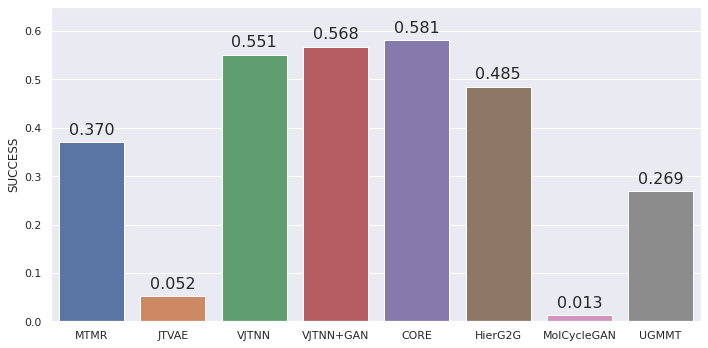

In [17]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(1,1,figsize=(10,5))

#_ = sns.barplot(x=df_merged.index, y=df_merged["SUCCESS"], ax=ax)
_ = sns.barplot(data=df_merged.reset_index(), x='index', y="SUCCESS", ax=ax)

for container in ax.containers:
    for i, bar in enumerate(container.get_children()):
        posx = i
        posy = bar.get_height() + 0.01
        ax.text(posx, posy, f"{bar.get_height():.3f}", rotation=0, ha='center', va='bottom', fontsize=16)

ax.set_xlabel(None)
ax.set_ylim(None, 0.65)
        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "barplot_success.png"), dpi=300)